# Regresión Lineal usando Gradiente Descendente

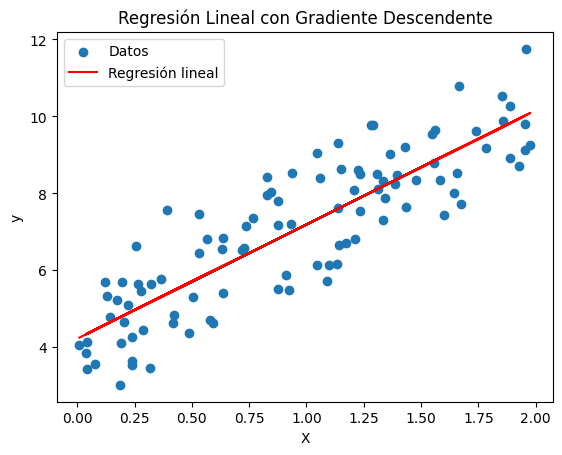

Parámetros encontrados (GD):
Pendiente: 2.968467590331236
Intersección: 4.222150987705825
Último Error: 0.9924386487246505


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos para la regresión lineal
# FORMA 1
# X = np.random.uniform(0, 10, size=(100, 1))  # X se genera utilizando np.random.uniform(), lo que crea una matriz de 100 filas y 1 columna con números aleatorios uniformemente distribuidos entre 0 y 10.
# y = 3 * X + np.random.normal(0, 2, size=(100, 1))  # y se calcula como una relación lineal con X, multiplicando cada valor de X por 3 y sumándole un término de error aleatorio generado con np.random.normal().

# FORMA 2
np.random.seed(0) # se utiliza para establecer la semilla del generador de números aleatorios en 0, lo que asegura la reproducibilidad de los resultados.
X = 2 * np.random.rand(100, 1) # X se genera utilizando np.random.rand(), que crea una matriz de 100 filas y 1 columna con números aleatorios uniformemente distribuidos entre 0 y 1, que luego se escalan por 2 para tener valores entre 0 y 2.
y = 4 + 3 * X + np.random.randn(100, 1) # y se calcula como una relación lineal con X, multiplicando cada valor de X por 3, sumándole 4 y añadiéndole un término de error aleatorio generado con np.random.randn().

# ************************************************************************************************************************

def calcular_error_cuadratico_medio(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def regresion_lineal_gradiente_descendente(X, y, learning_rate=0.01, epochs=10000):
    m = len(X)
    theta = np.zeros(2) # crear un arreglo de tamaño 2 con todos sus elementos inicializados a cero
    losses = []

    for _ in range(epochs):
        y_pred = theta[0] + theta[1] * X
        error = y_pred - y
        gradient_0 = (1/m) * np.sum(error)
        gradient_1 = (1/m) * np.sum(error * X)
        theta[0] -= learning_rate * gradient_0
        theta[1] -= learning_rate * gradient_1
        
        loss = calcular_error_cuadratico_medio(y, y_pred)
        losses.append(loss)
    
    return theta, losses

def graficar_regresion_lineal(X, y, theta):
    y_pred = theta[0] + theta[1] * X
    plt.scatter(X, y, label='Datos')
    plt.plot(X, y_pred, color='red', label='Regresión lineal')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Regresión Lineal con Gradiente Descendente')
    plt.legend()
    plt.show()

# Entrenar el modelo utilizando gradiente descendente
theta, losses = regresion_lineal_gradiente_descendente(X, y)

# Graficar
graficar_regresion_lineal(X, y, theta)

# Imprimir los parámetros encontrados
print("Parámetros encontrados (GD):")
print("Pendiente:", theta[1])
print("Intersección:", theta[0])
print("Último Error:", losses[-1])
